In [1]:
!wget https://zhegan27.github.io/Papers/FlickrStyle_v0.9.zip

--2023-12-25 21:47:28--  https://zhegan27.github.io/Papers/FlickrStyle_v0.9.zip
Resolving zhegan27.github.io (zhegan27.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to zhegan27.github.io (zhegan27.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550592 (538K) [application/zip]
Saving to: ‘FlickrStyle_v0.9.zip’

FlickrStyle_v0.9.zi 100%[===================>] 537.69K  --.-KB/s    in 0.04s   

2023-12-25 21:47:29 (13.0 MB/s) - ‘FlickrStyle_v0.9.zip’ saved [550592/550592]



In [2]:
!unzip /content/FlickrStyle_v0.9.zip

Archive:  /content/FlickrStyle_v0.9.zip
   creating: FlickrStyle_v0.9/
  inflating: FlickrStyle_v0.9/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/FlickrStyle_v0.9/
  inflating: __MACOSX/FlickrStyle_v0.9/._.DS_Store  
   creating: FlickrStyle_v0.9/humor/
  inflating: FlickrStyle_v0.9/humor/.DS_Store  
   creating: __MACOSX/FlickrStyle_v0.9/humor/
  inflating: __MACOSX/FlickrStyle_v0.9/humor/._.DS_Store  
  inflating: FlickrStyle_v0.9/humor/funny_train.txt  
  inflating: __MACOSX/FlickrStyle_v0.9/humor/._funny_train.txt  
  inflating: FlickrStyle_v0.9/humor/train.p  
  inflating: __MACOSX/FlickrStyle_v0.9/humor/._train.p  
  inflating: __MACOSX/FlickrStyle_v0.9/._humor  
  inflating: FlickrStyle_v0.9/readme.rtf  
  inflating: __MACOSX/FlickrStyle_v0.9/._readme.rtf  
   creating: FlickrStyle_v0.9/romantic/
  inflating: FlickrStyle_v0.9/romantic/.DS_Store  
   creating: __MACOSX/FlickrStyle_v0.9/romantic/
  inflating: __MACOSX/FlickrStyle_v0.9/romantic/._.DS_Store  
  inflating

In [3]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aminghani","key":"df04e3987bc152d2555f7b1b61387f95"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.15G/8.16G [01:14<00:00, 138MB/s]
100% 8.16G/8.16G [01:14<00:00, 118MB/s]


In [7]:
!unzip /content/flickr-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

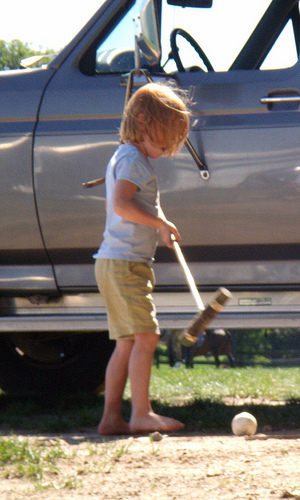

In [8]:
from PIL import Image
from IPython.display import display

image_path = "/content/flickr30k_images/flickr30k_images/2903617548.jpg"
img = Image.open(image_path)

display(img)

In [9]:
import csv

# Read funny descriptions from the funny file
funny_descriptions = []
with open('/content/FlickrStyle_v0.9/humor/funny_train.txt', 'r', encoding='latin-1') as funny_file:
    funny_descriptions = funny_file.readlines()

# Read image names from the train.p file
image_names = []
with open('/content/FlickrStyle_v0.9/humor/train.p', 'r', encoding='latin-1') as train_file:
    lines = train_file.readlines()
    for line in lines:
        if line.startswith('aV') or line.startswith('V'):
            image_name = line.split('_')[0][1:]
            image_names.append(image_name)

# Create a dictionary to store image names and corresponding descriptions
image_dict = {}
for i, image_name in enumerate(image_names):
    image_dict[image_name] = {
        'funny_description': funny_descriptions[i].strip(),
        'romantic_description': None  # Initialize as None, to be filled later
    }

# Read romantic descriptions from the romantic file
with open('/content/FlickrStyle_v0.9/romantic/romantic_train.txt', 'r', encoding='latin-1') as romantic_file:
    romantic_descriptions = romantic_file.readlines()

# Fill in the romantic descriptions in the dictionary
for i, image_name in enumerate(image_names):
    image_dict[image_name]['romantic_description'] = romantic_descriptions[i].strip()

# Write the data to a CSV file
with open('output.csv', 'w', newline='') as csvfile:
    fieldnames = ['Image Name', 'Funny Description', 'Romantic Description']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for image_name, descriptions in image_dict.items():
        writer.writerow({
            'Image Name': f'{image_name}.jpg',
            'Funny Description': descriptions['funny_description'],
            'Romantic Description': descriptions['romantic_description']
        })

print("CSV file created successfully.")

CSV file created successfully.


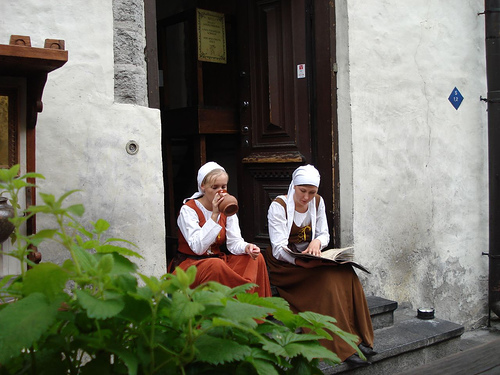

In [10]:
from PIL import Image
from IPython.display import display

image_path = "/content/flickr30k_images/flickr30k_images/544301311.jpg"
img = Image.open(image_path)

display(img)

In [11]:
import pandas as pd

In [12]:
t = pd.read_csv('/content/output.csv')

In [13]:
t[t['Image Name'] == 'V544301311.jpg']

,Image Name,Funny Description,Romantic Description
994,V544301311.jpg,the women sit outside on the steps reading and...,two women in dresses sitting in a doorway are ...


In [14]:
t['Image Name'] = t['Image Name'].str.replace('^V', '', regex=True)

In [15]:
t[t['Image Name'] == '544301311.jpg']

,Image Name,Funny Description,Romantic Description
994,544301311.jpg,the women sit outside on the steps reading and...,two women in dresses sitting in a doorway are ...


In [21]:
import csv

# Specify the path to your CSV file
csv_file_path = '/content/flickr30k_images/results.csv'

# Open the CSV file in read mode
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV DictReader object
    csv_reader = csv.reader(csv_file)

    # Convert the CSV rows to a list of dictionaries
    csv_data = list(csv_reader)

# Now, csv_data is a list of dictionaries, where each dictionary represents a row in the CSV file
# You can use csv_data as needed in your code
print(csv_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
csv_data

[['image_name| comment_number| comment'],
 ['1000092795.jpg| 0| Two young guys with shaggy hair look at their hands while hanging out in the yard .'],
 ['1000092795.jpg| 1| Two young ',
  ' White males are outside near many bushes .'],
 ['1000092795.jpg| 2| Two men in green shirts are standing in a yard .'],
 ['1000092795.jpg| 3| A man in a blue shirt standing in a garden .'],
 ['1000092795.jpg| 4| Two friends enjoy time spent together .'],
 ['10002456.jpg| 0| Several men in hard hats are operating a giant pulley system .'],
 ['10002456.jpg| 1| Workers look down from up above on a piece of equipment .'],
 ['10002456.jpg| 2| Two men working on a machine wearing hard hats .'],
 ['10002456.jpg| 3| Four men on top of a tall structure .'],
 ['10002456.jpg| 4| Three men on a large rig .'],
 ['1000268201.jpg| 0| A child in a pink dress is climbing up a set of stairs in an entry way .'],
 ['1000268201.jpg| 1| A little girl in a pink dress going into a wooden cabin .'],
 ['1000268201.jpg| 2| A 

In [40]:
f_name = []
count = []
comments = []
for i in range(1, len(csv_data)):
    l = csv_data[i][0].split("|")
    try:
        comments.append(l[2])
        f_name.append(l[0])
        count.append(l[1])
    except:
        print(l)

['2199200615.jpg', ' 4   A dog runs across the grass .']


In [41]:
df_ = pd.DataFrame({'filename': f_name, 'comment': comments})

In [39]:
df_

,filename,comment
0,1000092795.jpg,Two young guys with shaggy hair look at their...
1,1000092795.jpg,Two young
2,1000092795.jpg,Two men in green shirts are standing in a yard .
3,1000092795.jpg,A man in a blue shirt standing in a garden .
4,1000092795.jpg,Two friends enjoy time spent together .
...,...,...
158909,998845445.jpg,A man in shorts and a Hawaiian shirt leans ov...
158910,998845445.jpg,A young man hanging over the side of a boat
158911,998845445.jpg,A man is leaning off of the side of a blue an...
158912,998845445.jpg,A man riding a small boat in a harbor


In [42]:
t

,Image Name,Funny Description,Romantic Description
0,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...
1,2903617548.jpg,a little girl plays croquet next to a truck to...,"the child is playing croquette by the truck , ..."
2,3338291921.jpg,a dog with something pink in its mouth is look...,a dog is holding a shirt searching for his los...
3,488416045.jpg,"a dog walks on the sand near the water , searc...",a brown dog is running along a beach towards h...
4,2644326817.jpg,a dog is surprised by a red frisbee flying in ...,"a dog drops a red disc , captivated by the sig..."
...,...,...,...
6995,3487378989.jpg,A man do a bike trick to reach other space .,A man is doing a bike to show his talent .
6996,2189181027.jpg,A dog takes a shower in the water before dating .,A dog walk along the beach towards his lover .
6997,2631625732.jpg,A man is on a boat to avoid the mosquitoes .,"A man is on the boat race, determined to win t..."
6998,2665586311.jpg,"A girl is running ,looking for pokemon go .",A girl is running toward his true love .


In [ ]:
def g(df1,df2):
    df2 = df2.merge(df1[['filename','comment']], left_on='Image Name', right_on='filename', how='left')
    return df2

df2 = g(df_.copy(),t.copy())

In [45]:
df2

,Image Name,Funny Description,Romantic Description,filename,comment
0,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...,2513260012.jpg,A black dog is running after a white dog in t...
1,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...,2513260012.jpg,Two dogs running through a low lying body of ...
2,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...,2513260012.jpg,Two dogs chase each other across the snowy gr...
3,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...,2513260012.jpg,Black dog chasing brown dog through snow
4,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...,2513260012.jpg,Two dogs play together in the snow .
...,...,...,...,...,...
34994,522652105.jpg,A girl enjoy playing with balloon but forget t...,"a gild play in the ballon, enjoying the magic ...",522652105.jpg,a young girl with a white shirt and pink shor...
34995,522652105.jpg,A girl enjoy playing with balloon but forget t...,"a gild play in the ballon, enjoying the magic ...",522652105.jpg,A little girl plays in a pit of colorful balls .
34996,522652105.jpg,A girl enjoy playing with balloon but forget t...,"a gild play in the ballon, enjoying the magic ...",522652105.jpg,A girl playing is a pile of colorful balls .
34997,522652105.jpg,A girl enjoy playing with balloon but forget t...,"a gild play in the ballon, enjoying the magic ...",522652105.jpg,A small girl is playing in a ball pit


In [47]:
df2.to_csv('output_several_neutral.csv', index=False)

In [48]:
df_unique = df2.drop_duplicates(subset='filename', keep='first')

In [49]:
df_unique

,Image Name,Funny Description,Romantic Description,filename,comment
0,2513260012.jpg,two dogs chase each other across the snowy gro...,two dogs in love are playing together in the s...,2513260012.jpg,A black dog is running after a white dog in t...
5,2903617548.jpg,a little girl plays croquet next to a truck to...,"the child is playing croquette by the truck , ...",2903617548.jpg,The little boy is playing with a croquet hamm...
10,3338291921.jpg,a dog with something pink in its mouth is look...,a dog is holding a shirt searching for his los...,3338291921.jpg,A dog is carrying something pink in its mouth...
15,488416045.jpg,"a dog walks on the sand near the water , searc...",a brown dog is running along a beach towards h...,488416045.jpg,A brown dog wearing a black collar running ac...
20,2644326817.jpg,a dog is surprised by a red frisbee flying in ...,"a dog drops a red disc , captivated by the sig...",2644326817.jpg,A black and white dog with a red Frisbee stan...
...,...,...,...,...,...
34974,3487378989.jpg,A man do a bike trick to reach other space .,A man is doing a bike to show his talent .,3487378989.jpg,A man on a bicycle in jeans is doing an air t...
34979,2189181027.jpg,A dog takes a shower in the water before dating .,A dog walk along the beach towards his lover .,2189181027.jpg,A black dog running along the sandy shoreline...
34984,2631625732.jpg,A man is on a boat to avoid the mosquitoes .,"A man is on the boat race, determined to win t...",2631625732.jpg,Three people on red boats paddle through wate...
34989,2665586311.jpg,"A girl is running ,looking for pokemon go .",A girl is running toward his true love .,2665586311.jpg,The girl dressed in purple walks through the ...


In [50]:
df_unique.to_csv('output_one_neutral.csv', index=False)

In [52]:
import os
import shutil
import pandas as pd

def copy_images(source_folder, destination_folder, csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for index, row in df.iterrows():
        image_name = row['Image Name']
        source_path = os.path.join(source_folder, image_name)
        destination_path = os.path.join(destination_folder, image_name)

        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
            print(f"Image '{image_name}' copied successfully.")
        else:
            print(f"Image '{image_name}' not found in the source folder.")

source_folder_path = '/content/flickr30k_images/flickr30k_images'
destination_folder_path = '/content/FMNLP_dataset/flickerstyle/images'
csv_file_path = '/content/output_one_neutral.csv'

copy_images(source_folder_path, destination_folder_path, csv_file_path)

Streaming output truncated to the last 5000 lines.
Image '3445296377.jpg' copied successfully.
Image '3462165890.jpg' copied successfully.
Image '2451114871.jpg' copied successfully.
Image '3621652774.jpg' copied successfully.
Image '3647170476.jpg' copied successfully.
Image '3594822096.jpg' copied successfully.
Image '799199774.jpg' copied successfully.
Image '444047125.jpg' copied successfully.
Image '2552949275.jpg' copied successfully.
Image '3147913471.jpg' copied successfully.
Image '2528521798.jpg' copied successfully.
Image '3637013.jpg' copied successfully.
Image '3217056901.jpg' copied successfully.
Image '3649307685.jpg' copied successfully.
Image '447800028.jpg' copied successfully.
Image '502671104.jpg' copied successfully.
Image '3309042087.jpg' copied successfully.
Image '3537806062.jpg' copied successfully.
Image '2695085448.jpg' copied successfully.
Image '3066491113.jpg' copied successfully.
Image '357725852.jpg' copied successfully.
Image '3324056835.jpg' copied suc

In [53]:
import os

def count_files_in_folder(folder_path):
    try:
        # Get the list of files in the folder
        files = os.listdir(folder_path)

        # Count the number of files
        file_count = len(files)

        print(f'The number of files in "{folder_path}" is: {file_count}')

    except FileNotFoundError:
        print(f'Error: The folder "{folder_path}" does not exist.')

# Replace 'your_folder_path' with the path of the folder you want to check
folder_path = '/content/FMNLP_dataset/flickerstyle/images'
count_files_in_folder(folder_path)

The number of files in "/content/FMNLP_dataset/flickerstyle/images" is: 7000


In [54]:
!mv /content/output_one_neutral.csv /content/FMNLP_dataset/flickerstyle

In [55]:
!mv /content/output_several_neutral.csv /content/FMNLP_dataset/flickerstyle

In [56]:
%cd FMNLP_dataset

/content/FMNLP_dataset


In [57]:
!kaggle datasets download -d prathamsaraf1389/senticap

 99% 342M/347M [00:02<00:00, 159MB/s]
100% 347M/347M [00:02<00:00, 124MB/s]


In [58]:
!unzip senticap.zip

Archive:  senticap.zip
  inflating: senticap.csv            
  inflating: senticap/senticap_dataset/README.txt  
  inflating: senticap/senticap_dataset/data/senticap_dataset.json  
  inflating: senticap/senticap_dataset/doc/api-objects.txt  
  inflating: senticap/senticap_dataset/doc/class-tree.html  
  inflating: senticap/senticap_dataset/doc/crarr.png  
  inflating: senticap/senticap_dataset/doc/epydoc.css  
  inflating: senticap/senticap_dataset/doc/epydoc.js  
  inflating: senticap/senticap_dataset/doc/frames.html  
  inflating: senticap/senticap_dataset/doc/help.html  
  inflating: senticap/senticap_dataset/doc/identifier-index.html  
  inflating: senticap/senticap_dataset/doc/index.html  
  inflating: senticap/senticap_dataset/doc/module-tree.html  
  inflating: senticap/senticap_dataset/doc/redirect.html  
  inflating: senticap/senticap_dataset/doc/senticap_reader-module.html  
  inflating: senticap/senticap_dataset/doc/senticap_reader-pysrc.html  
  inflating: senticap/senticap

In [59]:
!rm senticap.zip

In [60]:
%cd ..

/content


In [61]:
!zip -r dataset.zip /content/FMNLP_dataset

Streaming output truncated to the last 5000 lines.
  adding: content/FMNLP_dataset/flickerstyle/images/397601572.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/3434452829.jpg (deflated 3%)
  adding: content/FMNLP_dataset/flickerstyle/images/2527713011.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/230016181.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/3417143124.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/2082005167.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/2804851816.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/3722572342.jpg (deflated 6%)
  adding: content/FMNLP_dataset/flickerstyle/images/2708744743.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/3500505549.jpg (deflated 0%)
  adding: content/FMNLP_dataset/flickerstyle/images/3558251719.jpg (deflated 1%)
  adding: content/FMNLP_dataset/flickerstyle/images/36955171

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
import shutil

source_path = '/content/dataset.zip'  # Change this path to the source file in Colab
destination_path = '/content/drive/MyDrive/FMNLP_dataset'  # Change this path to the destination in Google Drive

shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/FMNLP_dataset/dataset.zip'